In [8]:
import scipy.io
import numpy as np 
import pdb
import torch
#from common.data_normalization import *
#from common.pt_build_model import *
import matplotlib.pyplot as plt
import glob,pickle,os,copy,sys,random
from sys import argv
path='/Users/zsbjltwjj/Downloads/t42_hand/beliefspaceplanning/sim_nn_node/models/'
path2='/Users/zsbjltwjj/Downloads/t42_hand/beliefspaceplanning/sim_nn_node/models/ratios/'
paths=[path,path2]
#paths=['/Users/zsbjltwjj/Downloads/t42_hand/beliefspaceplanning/sim_nn_node/models/']
tail=['','_ho40','_ho0.99']
tail2=['_ho0.5','_ho0.6','_ho0.7','_ho0.8','_ho0.9','_ho0.95','_ho0.99']
tails=[tail,tail2]
tails=[[''],['_ho0.5']]
# argv lr heldout nntype seed dropout nodes epoch nm ne suffix(v1_, avi_v1_, ...)

(1036, 2)


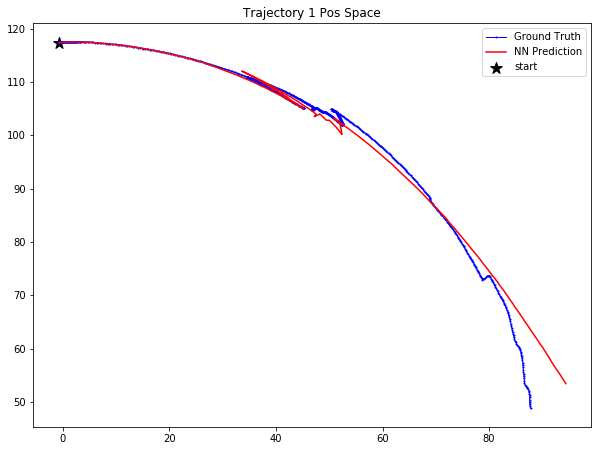

(1036, 2)


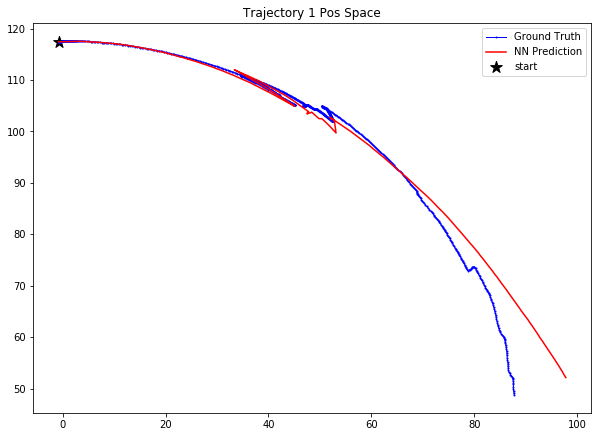

(1397, 2)


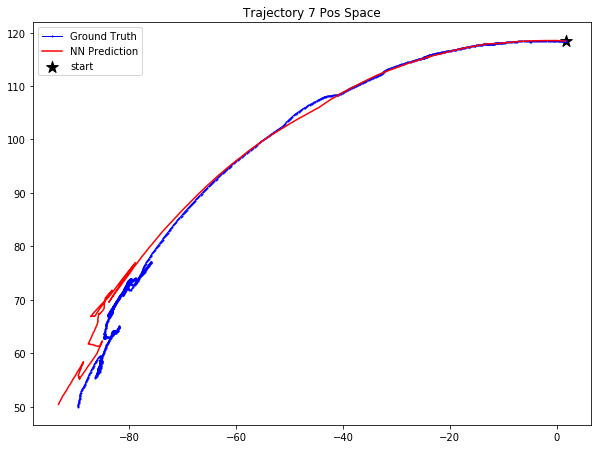

(1397, 2)


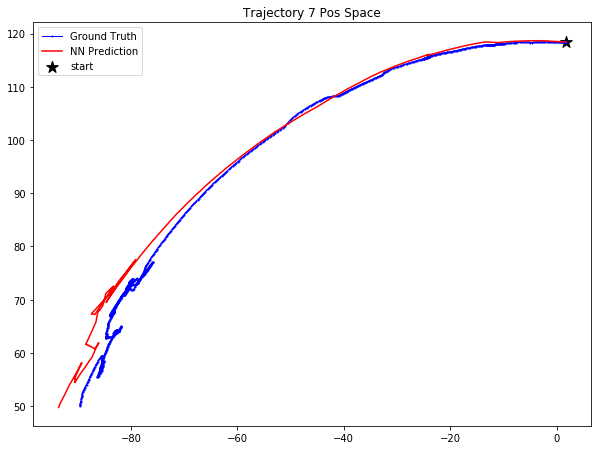

(1579, 2)


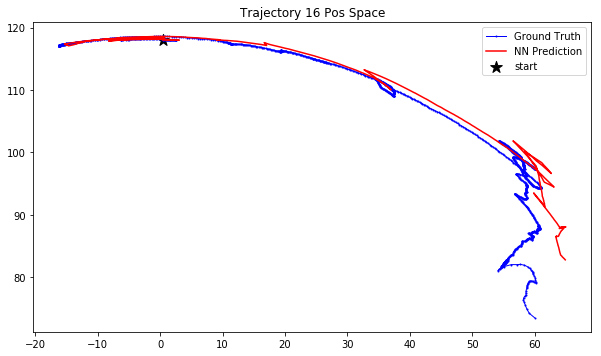

(1579, 2)


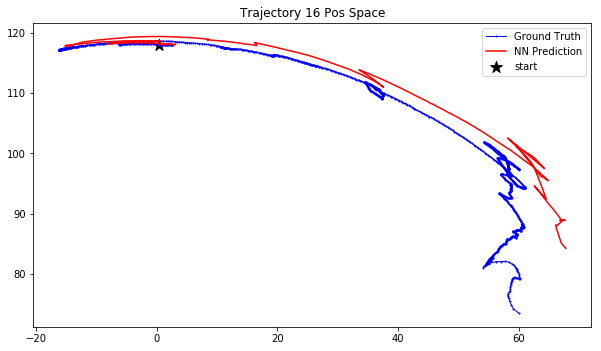

(3581, 2)


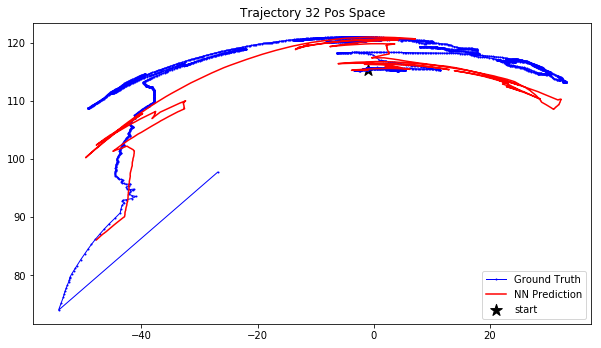

(3581, 2)


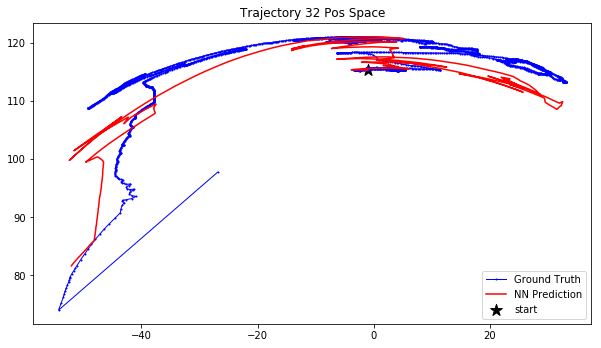

In [10]:
file_name='/Users/zsbjltwjj/Desktop/robotic_hand_simulator/sim_data_cont_v0_d4_m1_episodes.obj'
with open(file_name, 'rb') as filehandler:
    memory = pickle.load(filehandler,encoding='latin')
i=1
for idx in [0,6,15,31]:
    gd=memory[idx][:,:4]
    gd_next=memory[idx][:,-4:]
    ac=memory[idx][:,4:6]
    #print(ac)
    np.savetxt('acs.txt',ac,fmt='%.20f', delimiter=',')
    def normalize(data,x_std_arr,x_mean_arr):
        return (data - x_mean_arr[:data.shape[-1]]) / x_std_arr[:data.shape[-1]]
    def denormalize(data,y_std_arr,y_mean_arr):
        return data * y_std_arr[:data.shape[-1]] + y_mean_arr[:data.shape[-1]]
    def get_ground_truth(gd,gd_next):
        traj=[gd[0,:2]]
        for i in range(gd.shape[0]-1):
            if (gd_next[i,:]==gd[i+1,:]).all():
                traj.append(gd[i+1,:2])
            else:
                traj.append(gd_next[i,:2])
                traj.append(gd[i+1,:2])
        traj.append(gd_next[-1,:2])
        return np.array(traj)
    def predict(init_state,ac,norm_name,model):
        with open(norm_name, 'rb') as pickle_file:
            x_norm_arr, y_norm_arr = pickle.load(pickle_file)
            x_mean_arr, x_std_arr = x_norm_arr[0], x_norm_arr[1]
            y_mean_arr, y_std_arr = y_norm_arr[0], y_norm_arr[1]
        next_state_ls=[init_state[:2]]
        for i in range(ac.shape[0]):
            sa=np.concatenate([init_state,ac[i,:]])
            inpt = normalize(sa,x_std_arr,x_mean_arr)
            inpt = torch.tensor(inpt, dtype=torch.float)
            state_delta = model(inpt)    
            state_delta = state_delta.detach().numpy()
            state_delta = denormalize(state_delta,y_std_arr,y_mean_arr)
            next_state= (sa[:4] + state_delta)
            next_state_ls.append(next_state[:2])
            init_state=next_state
        return np.array(next_state_ls)
    gd_truth=get_ground_truth(gd,gd_next)


    for check_idx in [0,1]:
        pathh,taill=paths[check_idx],tails[check_idx]
        for xx in range(len(taill)):
            md='sim_cont_trajT_bs512_model512_BS64_loadT'+taill[xx]
            if pathh[-3]=='o':
                model_name = pathh+md
            else:
                model_name = pathh+md+'.pkl'
            norm_name = pathh+'normalization_arr_'+md+'_py2'
            with open(model_name, 'rb') as pickle_file:
                model = torch.load(pickle_file, map_location='cpu')

            pred_states=predict(gd[0,:],ac,norm_name,model)
            print(pred_states.shape)
            fig = plt.figure()
            plt.scatter(gd_truth[0, 0], gd_truth[0, 1], s=150, c='k', marker="*",label='start')
            plt.plot(gd_truth[:, 0], gd_truth[:, 1], color='blue', label='Ground Truth', marker='.', markersize=2, linewidth=1)
            plt.plot(pred_states[:, 0], pred_states[:, 1], color='red', label='NN Prediction')
            plt.axis('scaled')
            #if taill[xx]=='':
                #plt.title('No Suffix: '+'Trajectory '+str(idx+1)+ ' Pos Space')
            #else:
                #plt.title('Suffix '+taill[xx][1:]+': Trajectory '+str(idx+1)+ ' Pos Space')
            plt.title('Trajectory '+str(idx+1)+ ' Pos Space')
            plt.legend()
            #fig_loc=pred_fig_path +'_traj_'+str(i+1)+'_pos.png'
            fig.set_size_inches(10, 10)
            #fig.savefig(os.path.abspath('./trans_model_data/gazebo_ah_pred/traj_'+str(i)+'_pos.png'))
            plt.show()
    i+=1

(1397, 2)


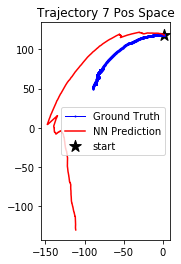

(1397, 2)


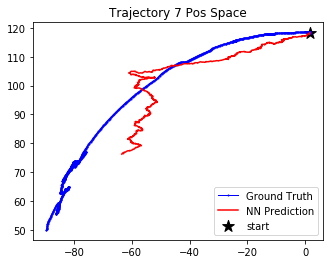

(1397, 2)


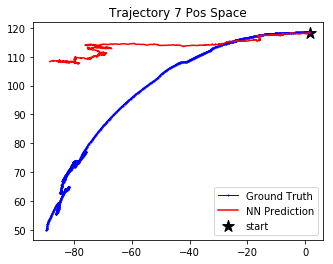

In [16]:
idx=6
file_name='/Users/zsbjltwjj/Desktop/robotic_hand_simulator/sim_data_cont_v0_d4_m1_episodes.obj'
with open(file_name, 'rb') as filehandler:
    memory = pickle.load(filehandler,encoding='latin')
gd=memory[idx][:,:4]
gd_next=memory[idx][:,-4:]
ac=memory[idx][:,4:6]
def normalize(data,x_std_arr,x_mean_arr):
    return (data - x_mean_arr[:data.shape[-1]]) / x_std_arr[:data.shape[-1]]
def denormalize(data,y_std_arr,y_mean_arr):
    return data * y_std_arr[:data.shape[-1]] + y_mean_arr[:data.shape[-1]]
def get_ground_truth(gd,gd_next):
    traj=[gd[0,:2]]
    for i in range(gd.shape[0]-1):
        if (gd_next[i,:]==gd[i+1,:]).all():
            traj.append(gd[i+1,:2])
        else:
            traj.append(gd_next[i,:2])
            traj.append(gd[i+1,:2])
    traj.append(gd_next[-1,:2])
    return np.array(traj)
gd_truth=get_ground_truth(gd,gd_next)
def predict(init_state,ac,norm_name,model):
    with open(norm_name, 'rb') as pickle_file:
        x_norm_arr, y_norm_arr = pickle.load(pickle_file)
        x_mean_arr, x_std_arr = x_norm_arr[0], x_norm_arr[1]
        y_mean_arr, y_std_arr = y_norm_arr[0], y_norm_arr[1]
    next_state_ls=[init_state[:2]]
    for i in range(ac.shape[0]):
        sa=np.concatenate([init_state,ac[i,:]])
        inpt = normalize(sa,x_std_arr,x_mean_arr)
        inpt = torch.tensor(inpt, dtype=torch.float)
        state_delta = model(inpt)
        state_delta = state_delta.detach().numpy()
        state_delta = denormalize(state_delta,y_std_arr,y_mean_arr)
        next_state= (sa[:4] + state_delta)
        next_state_ls.append(next_state[:2])
        init_state=next_state
    return np.array(next_state_ls)


path_li='/Users/zsbjltwjj/Desktop/Liam-Bayesian-hand-transfer-gym/save_model/robotic_hand_simulator/pytorch/'
norm_name_li = path_li+'normalization_arr/normalization_arr'
mds=['sim_A_heldout0.1_1.pkl','sim_A_heldout0.9_1.pkl','sim_B_heldout0.9_1.pkl']
for md_li in mds:
    model_name_li = path_li+md_li
    with open(model_name_li, 'rb') as pickle_file:
        model = torch.load(pickle_file, map_location='cpu')

    pred_states=predict(gd[0,:],ac,norm_name_li,model)
    print(pred_states.shape)
    fig = plt.figure()
    plt.scatter(gd_truth[0, 0], gd_truth[0, 1], s=150, c='k', marker="*",label='start')
    plt.plot(gd_truth[:, 0], gd_truth[:, 1], color='blue', label='Ground Truth', marker='.', markersize=2, linewidth=1)
    plt.plot(pred_states[:, 0], pred_states[:, 1], color='red', label='NN Prediction')
    plt.axis('scaled')
    plt.title('Trajectory '+str(idx+1)+ ' Pos Space')
    plt.legend()
    plt.show()
    #fig_loc=pred_fig_path +'_traj_'+str(i+1)+'_pos.png'
    fig.set_size_inches(10, 10)

In [18]:
path='/Users/zsbjltwjj/Desktop/robotic_hand_simulator/'
pathnorm='/Users/zsbjltwjj/Desktop/beliefspaceplanning/'
filename=path+“”
with open(filename, 'rb') as filehandler:
    memory = pickle.load(filehandler,encoding='latin')
print(len(memory))
print(memory[0].shape)
sm=0
ct=0
for i in memory:
    #if i.shape[0]!=1:
    #print(i.shape[0])
        #for ln in range(i.shape[0]):
        #    if np.linalg.norm(i[ln,:4]-i[ln,-4:])>=3:
        #        print("a")
        #        break
    #if ct<647:
    if ct<100:
        print(i[0,:4])
    sm+=i.shape[0]
    ct+=1
    

array([1., 1., 1., 1.])